# Hamoye Capstone Project: Age & Gender Detection

### by : Beanstalk

The dataset includes a CSV of facial images that are labeled on the basis of age, gender, and ethnicity.The dataset includes 27305 rows and 5 columns, age, ethnicity, gender, img_name and pixels.

The project will be based on a CNN (Conventional Neutral Networks) model to detect the variables of interest (Age & Gender). In order to reach that we have to follow some steps which are included in the methodology.

## Methodology of the project:
The project will be devised into 5 parts:
1. Data Collection and Assessment
2. Data Cleaning and wrangling
3. Data Visualization 
4. Features engineering
5. Data Modeling and Evaluation
6. Model Testing

## Data Collection and Assessment
Firstly we have to collect our dataset, fortunately the dataset is provided by kaggle and we can easy import it to our project directly through kaggle API. Please following the code bellow to import the data without errors.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# we have to install kaggle via pip for using kaggle

! pip install -q kaggle

In [3]:
# we need to import the json file that contains kaggle API 
# Upload

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahultg08","key":"7cd397f1b4d4ca8f89eea8eaae584732"}'}

In [4]:
# The following code will make a directory
# will copy the json file inside it and give it authority 
# gives read and write permission to user (rwx => ugo)

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

**Extract and download the dataset**

In [5]:
# Use Kaggle API to download the required dataset

!kaggle datasets download nipunarora8/age-gender-and-ethnicity-face-data-csv

 98% 62.0M/63.2M [00:02<00:00, 32.9MB/s]
100% 63.2M/63.2M [00:02<00:00, 25.8MB/s]


In [6]:
# Since it's downloaded in zip format, we have to extract it

! unzip /content/age-gender-and-ethnicity-face-data-csv.zip

Archive:  /content/age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


### Read data

**1. Import the necessary libraries**

After collection our dataset, now we have to import it and assess it using different assessement methods.

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import cv2

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report
from sklearn import metrics
from sklearn.utils import shuffle
from PIL import Image
from tqdm import tqdm

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, History
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, Dense, LSTM, Flatten, MaxPool2D, MaxPooling2D, BatchNormalization, Dropout

**2. Import the Dataset**

In [8]:
# Utilizing gpu device for fast and efficient code run
device_list = tf.test.gpu_device_name()
device_list

'/device:GPU:0'

In [9]:
# we import the dataset using the following code

df = pd.read_csv('/content/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [10]:
df.tail()

,age,ethnicity,gender,img_name,pixels
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...
23704,99,0,1,20170110182052119.jpg.chip.jpg,156 161 160 165 170 173 166 177 183 191 187 18...


In [11]:
df.shape

(23705, 5)

In [12]:
df['img_name'][0]

'20161219203650636.jpg.chip.jpg'

In [13]:
df.iloc[0, 4]

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1

In [14]:
type(df.iloc[0, 4])

str

In [15]:
# Converting each of the value to int type
values = df.iloc[2, 4].split()
test_col = [eval(i) for i in values]

In [16]:
test_col

[67,
 70,
 71,
 70,
 69,
 67,
 70,
 79,
 90,
 103,
 116,
 132,
 145,
 155,
 161,
 166,
 169,
 175,
 177,
 178,
 179,
 180,
 183,
 186,
 187,
 188,
 192,
 194,
 198,
 203,
 206,
 213,
 214,
 216,
 220,
 219,
 215,
 213,
 211,
 211,
 210,
 207,
 206,
 203,
 200,
 197,
 194,
 192,
 65,
 66,
 69,
 70,
 70,
 69,
 72,
 83,
 88,
 100,
 112,
 125,
 139,
 155,
 159,
 165,
 167,
 170,
 174,
 176,
 178,
 177,
 180,
 185,
 186,
 187,
 190,
 193,
 195,
 197,
 201,
 207,
 208,
 212,
 215,
 215,
 215,
 213,
 211,
 211,
 210,
 207,
 204,
 201,
 200,
 197,
 194,
 192,
 61,
 63,
 69,
 71,
 70,
 70,
 72,
 81,
 87,
 100,
 113,
 123,
 137,
 149,
 153,
 158,
 164,
 166,
 171,
 173,
 173,
 174,
 182,
 185,
 184,
 188,
 190,
 191,
 189,
 192,
 197,
 201,
 204,
 210,
 213,
 212,
 211,
 211,
 208,
 209,
 208,
 206,
 204,
 199,
 199,
 197,
 194,
 190,
 56,
 62,
 69,
 71,
 72,
 72,
 73,
 80,
 88,
 103,
 114,
 124,
 134,
 147,
 152,
 156,
 160,
 161,
 162,
 164,
 167,
 169,
 171,
 179,
 183,
 186,
 188,
 188,
 185

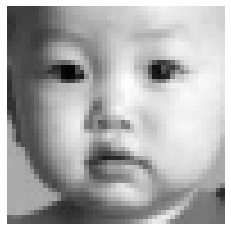

In [17]:
plt.imshow(np.array(test_col).reshape(48, 48), cmap = "gray")
plt.axis("off")
plt.show()

In [18]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [19]:
np.sort(df.age.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 103, 105, 110, 111, 115, 116])

In [20]:
import scipy.stats as ss

col = df.iloc[:, 0]
ss.describe(col)

DescribeResult(nobs=23705, minmax=(1, 116), mean=33.30090698164944, variance=395.4413867068805, skewness=0.6220013954103177, kurtosis=0.3172673627818887)

**3. Data Cleaning and Wrangling**

After we accessed the data and showed the data quality problems that we have to clean, the following part is dedicated to perform a cleaning and wrangling for the data in order to make it useful for the next part which is the visualization part.

In [21]:
# we drop the unused columns from the dataset

df.drop(columns=['ethnicity', 'img_name'], inplace=True)

In [22]:
df

,age,gender,pixels
0,1,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...
23700,99,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [23]:
df.iloc[0]

age                                                       1
gender                                                    0
pixels    129 128 128 126 127 130 133 135 139 142 145 14...
Name: 0, dtype: object

In [24]:
df.iloc[0]['pixels']

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1

In [25]:
# We extract the pixels from 'pixels' column to make them tidy

new_cols = []

for i in range(len(df)):
    row = df.iloc[i]['pixels']
    values = row.split()
    new_cols.append(values)

# new cols has list of pixel values for each instance
# Create new dataframe with separated values
new_df = pd.DataFrame(new_cols)

# Print new dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,129,128,128,126,127,130,133,135,139,142,...,123,129,134,138,142,144,144,146,146,146
1,164,74,111,168,169,171,175,182,184,188,...,168,189,223,241,236,232,204,182,170,148
2,67,70,71,70,69,67,70,79,90,103,...,117,113,116,116,117,117,115,112,111,108
3,193,197,198,200,199,200,202,203,204,205,...,218,222,227,228,228,230,231,235,239,246
4,202,205,209,210,209,209,210,211,212,214,...,165,167,167,167,168,171,171,167,163,161


In [26]:
len(values)

2304

In [27]:
values

['156',
 '161',
 '160',
 '165',
 '170',
 '173',
 '166',
 '177',
 '183',
 '191',
 '187',
 '186',
 '176',
 '176',
 '175',
 '183',
 '175',
 '173',
 '172',
 '164',
 '178',
 '179',
 '188',
 '157',
 '170',
 '159',
 '162',
 '153',
 '133',
 '143',
 '143',
 '132',
 '127',
 '114',
 '108',
 '114',
 '116',
 '113',
 '130',
 '129',
 '140',
 '146',
 '141',
 '146',
 '144',
 '149',
 '143',
 '146',
 '153',
 '145',
 '164',
 '163',
 '160',
 '167',
 '169',
 '170',
 '178',
 '173',
 '179',
 '177',
 '177',
 '188',
 '169',
 '179',
 '177',
 '169',
 '179',
 '178',
 '176',
 '185',
 '185',
 '177',
 '174',
 '177',
 '160',
 '159',
 '152',
 '147',
 '127',
 '120',
 '135',
 '115',
 '98',
 '103',
 '108',
 '105',
 '113',
 '125',
 '126',
 '134',
 '141',
 '141',
 '143',
 '147',
 '138',
 '132',
 '148',
 '145',
 '159',
 '168',
 '156',
 '149',
 '167',
 '177',
 '181',
 '176',
 '186',
 '182',
 '179',
 '171',
 '162',
 '172',
 '174',
 '183',
 '171',
 '179',
 '178',
 '178',
 '178',
 '175',
 '182',
 '170',
 '157',
 '148',
 '139',
 

In [28]:
new_cols

Output hidden; open in https://colab.research.google.com to view.

In [29]:
new_cols[1]

['164',
 '74',
 '111',
 '168',
 '169',
 '171',
 '175',
 '182',
 '184',
 '188',
 '193',
 '199',
 '200',
 '199',
 '200',
 '196',
 '198',
 '192',
 '193',
 '188',
 '187',
 '186',
 '187',
 '188',
 '183',
 '182',
 '178',
 '177',
 '175',
 '174',
 '176',
 '174',
 '172',
 '165',
 '158',
 '153',
 '147',
 '142',
 '138',
 '131',
 '125',
 '120',
 '114',
 '110',
 '110',
 '111',
 '111',
 '104',
 '179',
 '70',
 '128',
 '171',
 '169',
 '171',
 '175',
 '182',
 '183',
 '187',
 '193',
 '197',
 '198',
 '196',
 '194',
 '189',
 '188',
 '185',
 '183',
 '184',
 '180',
 '182',
 '184',
 '178',
 '174',
 '173',
 '173',
 '173',
 '174',
 '174',
 '176',
 '171',
 '165',
 '160',
 '154',
 '149',
 '144',
 '139',
 '133',
 '129',
 '125',
 '119',
 '117',
 '113',
 '110',
 '112',
 '113',
 '108',
 '176',
 '71',
 '146',
 '169',
 '168',
 '171',
 '175',
 '177',
 '182',
 '185',
 '186',
 '187',
 '188',
 '191',
 '191',
 '186',
 '185',
 '181',
 '179',
 '178',
 '173',
 '174',
 '176',
 '169',
 '164',
 '168',
 '168',
 '169',
 '170',
 '1

In [30]:
# There are 23705 instances with set of 2304 pixel values
len(new_cols)

23705

In [31]:
# number of instances and no. of pixels
new_df.shape

(23705, 2304)

In [32]:
# Let's see the first 5 lines of the data

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,129,128,128,126,127,130,133,135,139,142,...,123,129,134,138,142,144,144,146,146,146
1,164,74,111,168,169,171,175,182,184,188,...,168,189,223,241,236,232,204,182,170,148
2,67,70,71,70,69,67,70,79,90,103,...,117,113,116,116,117,117,115,112,111,108
3,193,197,198,200,199,200,202,203,204,205,...,218,222,227,228,228,230,231,235,239,246
4,202,205,209,210,209,209,210,211,212,214,...,165,167,167,167,168,171,171,167,163,161


In [33]:
new_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
23700,127,100,94,81,77,77,74,99,102,98,...,17,17,20,19,19,59,92,95,94,105
23701,23,28,32,35,42,47,68,85,98,103,...,81,75,74,75,71,73,72,72,85,96
23702,59,50,37,40,34,19,30,101,156,170,...,22,24,14,28,55,84,107,98,78,78
23703,45,108,120,156,206,197,140,180,191,199,...,8,14,27,65,77,93,59,32,35,35
23704,156,161,160,165,170,173,166,177,183,191,...,193,195,198,195,195,192,194,190,184,174


In [34]:
new_df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2299    0
2300    0
2301    0
2302    0
2303    0
Length: 2304, dtype: int64

In [35]:
# Thus we can have (48, 48) pixel values

np.sqrt(2304)

48.0

In [36]:
# Convert the dataframe column to float, and replace non-numeric values with NaN

new_df = new_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [37]:
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
  # If ‘raise’, then invalid parsing will raise an exception.

  # If ‘coerce’, then invalid parsing will be set as NaN.

  # If ‘ignore’, then invalid parsing will return the input.

In [38]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,129,128,128,126,127,130,133,135,139,142,...,123,129,134,138,142,144,144,146,146,146
1,164,74,111,168,169,171,175,182,184,188,...,168,189,223,241,236,232,204,182,170,148
2,67,70,71,70,69,67,70,79,90,103,...,117,113,116,116,117,117,115,112,111,108
3,193,197,198,200,199,200,202,203,204,205,...,218,222,227,228,228,230,231,235,239,246
4,202,205,209,210,209,209,210,211,212,214,...,165,167,167,167,168,171,171,167,163,161


In [39]:
# print the dimensions of the pixels

print(np.sqrt(new_df.shape[1]))
new_df.shape[1]

48.0


2304

In [40]:
df.drop(columns=['pixels'], inplace=True)

In [41]:
df

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
23700,99,1
23701,99,1
23702,99,1
23703,99,1


In [42]:
# Writing numeric pixel values of images to input CSV file

new_df.to_csv("/content/drive/MyDrive/Colab Notebooks/age gender detection/Inputs.csv", index=False)

In [43]:
# Writing numeric pixel values of images to output CSV file

df.to_csv("/content/drive/MyDrive/Colab Notebooks/age gender detection/Outputs.csv", index=False)

**4. Data Visualization**

After we cleaned our data and made it ready for use, in this part we will visualize our dataset in order to understand it and summarize it into beautiful and meaningful visualizations. We will also use the `imshow()` function from Matplotlib library to visualize or to show some pixels of our dataset (Face pictures).

In [44]:
# number of instances

len(new_df)

23705

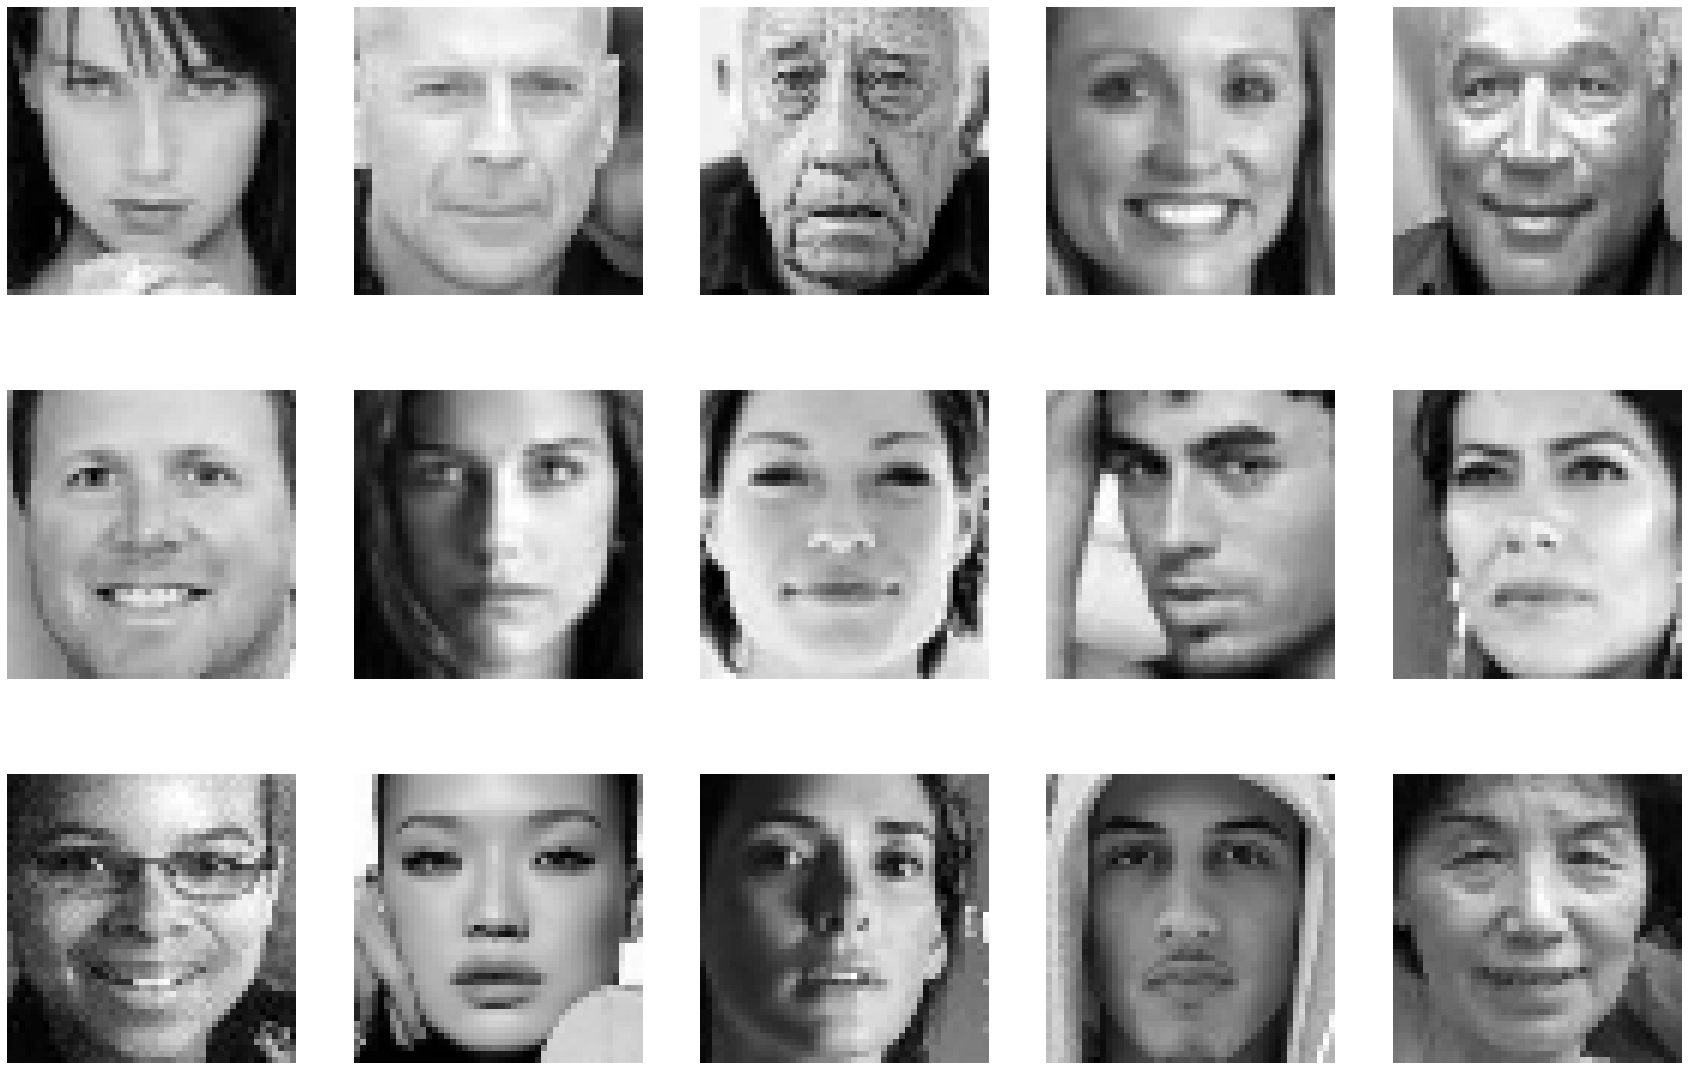

In [45]:
# The following code will sample 15 random rows (images) and visualize them
# Sampling random indexes

random_rows = random.sample(range(len(new_df)), 15)
images = new_df.iloc[random_rows, :]
# images = new_df.iloc[:30, :]  # This is for 1st 30 rows.

# Plot random 15 images
# 3 rows, 5 cols
fig, axs = plt.subplots(3, 5, figsize=(30, 20))

# flat casts on 1D
for i, ax in enumerate(axs.flat):
    ax.imshow(images.iloc[i].values.reshape(48, 48), cmap="gray")
    ax.axis("off")

plt.show()

In [46]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6c07e8e0>,
      dtype=object)

In [47]:
axs.flat

In [48]:
df

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
23700,99,1
23701,99,1
23702,99,1
23703,99,1


In [49]:
df.columns

Index(['age', 'gender'], dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


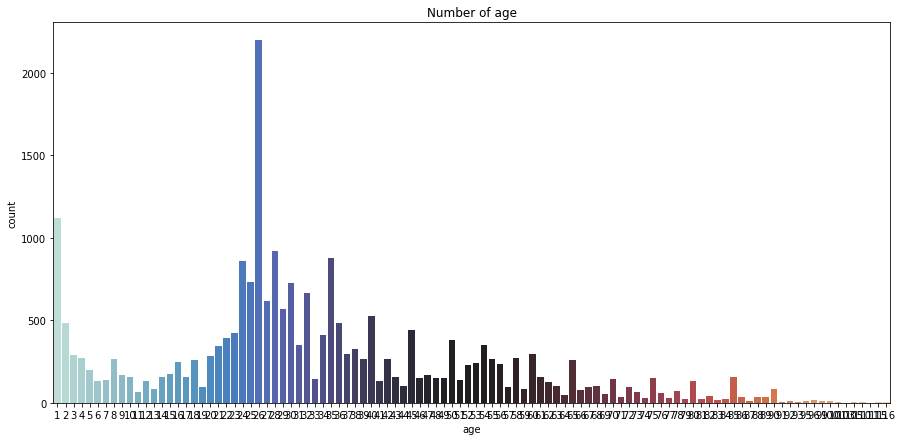

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


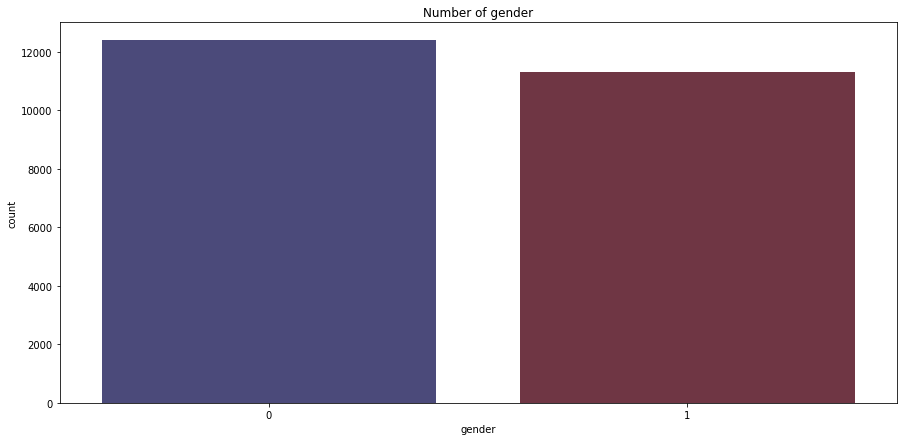

In [50]:
# Plotting the count plot

for i in df.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(df[i], palette="icefire")
    plt.title("Number of {}".format(i))
    plt.show()

In [51]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

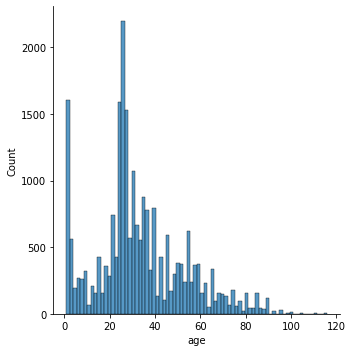

In [52]:
# Checking age distribution using seaborn displot
sns.displot(df.age)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


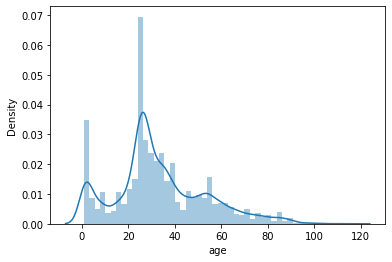

In [53]:
# Checking age distribution using seaborn distplot
sns.distplot(df.age)
plt.show()

**5. Features engineering**

In [54]:
X = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/age gender detection/Inputs.csv")

In [55]:
y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/age gender detection/Outputs.csv")

In [56]:
# Images

print(X.shape)
X

(23705, 2304)


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,129,128,128,126,127,130,133,135,139,142,...,123,129,134,138,142,144,144,146,146,146
1,164,74,111,168,169,171,175,182,184,188,...,168,189,223,241,236,232,204,182,170,148
2,67,70,71,70,69,67,70,79,90,103,...,117,113,116,116,117,117,115,112,111,108
3,193,197,198,200,199,200,202,203,204,205,...,218,222,227,228,228,230,231,235,239,246
4,202,205,209,210,209,209,210,211,212,214,...,165,167,167,167,168,171,171,167,163,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23700,127,100,94,81,77,77,74,99,102,98,...,17,17,20,19,19,59,92,95,94,105
23701,23,28,32,35,42,47,68,85,98,103,...,81,75,74,75,71,73,72,72,85,96
23702,59,50,37,40,34,19,30,101,156,170,...,22,24,14,28,55,84,107,98,78,78
23703,45,108,120,156,206,197,140,180,191,199,...,8,14,27,65,77,93,59,32,35,35


In [57]:
y.head()

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [58]:

y.nunique()

age       104
gender      2
dtype: int64

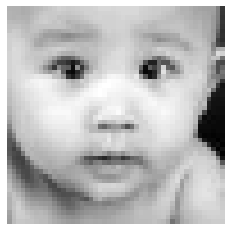

In [59]:
plt.imshow(X.iloc[0, :].values.reshape(48, 48), cmap = "gray")
plt.axis("off")
plt.show()

In [60]:
# Target

y

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
23700,99,1
23701,99,1
23702,99,1
23703,99,1


Reshape the data from (23705, 2304) to (23705, 48, 48, 1) where the last dimension represents the number of channels in the image (1 for grayscale, 3 for RGB).

Normalize the data between 0 and 1 by dividing it with 255.

In [61]:
type(X)

pandas.core.frame.DataFrame

In [62]:
X = np.array(X)
X = X.reshape(-1, 48, 48, 1)

In [63]:
X

array([[[[129],
         [128],
         [128],
         ...,
         [118],
         [ 99],
         [ 53]],

        [[130],
         [129],
         [128],
         ...,
         [117],
         [ 98],
         [ 52]],

        [[131],
         [129],
         [130],
         ...,
         [114],
         [ 97],
         [ 50]],

        ...,

        [[121],
         [138],
         [147],
         ...,
         [151],
         [150],
         [148]],

        [[117],
         [137],
         [146],
         ...,
         [149],
         [148],
         [148]],

        [[115],
         [135],
         [142],
         ...,
         [146],
         [146],
         [146]]],


       [[[164],
         [ 74],
         [111],
         ...,
         [111],
         [111],
         [104]],

        [[179],
         [ 70],
         [128],
         ...,
         [112],
         [113],
         [108]],

        [[176],
         [ 71],
         [146],
         ...,
         [112],
         [

In [64]:
X.shape

(23705, 48, 48, 1)

In [65]:
# X = np.stack(np.array(X), axis=0)

# np.stack does the stacking i.e. it is used for joining sequence of values across specified axis, here along row

In [66]:
X[0]

array([[[129],
        [128],
        [128],
        ...,
        [118],
        [ 99],
        [ 53]],

       [[130],
        [129],
        [128],
        ...,
        [117],
        [ 98],
        [ 52]],

       [[131],
        [129],
        [130],
        ...,
        [114],
        [ 97],
        [ 50]],

       ...,

       [[121],
        [138],
        [147],
        ...,
        [151],
        [150],
        [148]],

       [[117],
        [137],
        [146],
        ...,
        [149],
        [148],
        [148]],

       [[115],
        [135],
        [142],
        ...,
        [146],
        [146],
        [146]]])

In [67]:
X[0].shape

(48, 48, 1)

In [68]:
X1 = X.copy()
y1 = y.copy()

In [69]:
X.shape

(23705, 48, 48, 1)

In [70]:
X[21645].reshape(48, 48)

array([[150, 140, 143, ..., 149, 140, 155],
       [154, 128, 170, ..., 153, 140, 142],
       [135, 141, 160, ..., 182, 142, 116],
       ...,
       [139, 131, 144, ...,  54,  34,  91],
       [116, 118, 137, ..., 100,  95,  85],
       [116, 116, 132, ..., 120,  72, 106]])

Age:68, Gender:1


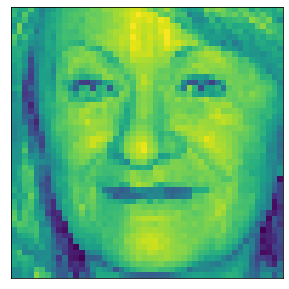

In [71]:
# Print random image
# OneHot Encoded the gender column
# Male => 0
# Female => 1
# Removing 3rd dimension i.e. 1 channel and getting it to the dimension of (48, 48)

idx = 21645
plt.figure(figsize = (5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X[idx].reshape(48, 48))
print(f'Age:{df.age.iloc[idx]}, Gender:{df.gender.iloc[idx]}')

In [72]:
y.nunique()

age       104
gender      2
dtype: int64

In [73]:
y.gender.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [74]:
y

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
23700,99,1
23701,99,1
23702,99,1
23703,99,1


In [75]:
y.columns

Index(['age', 'gender'], dtype='object')

In [76]:
y['age']

0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of age')

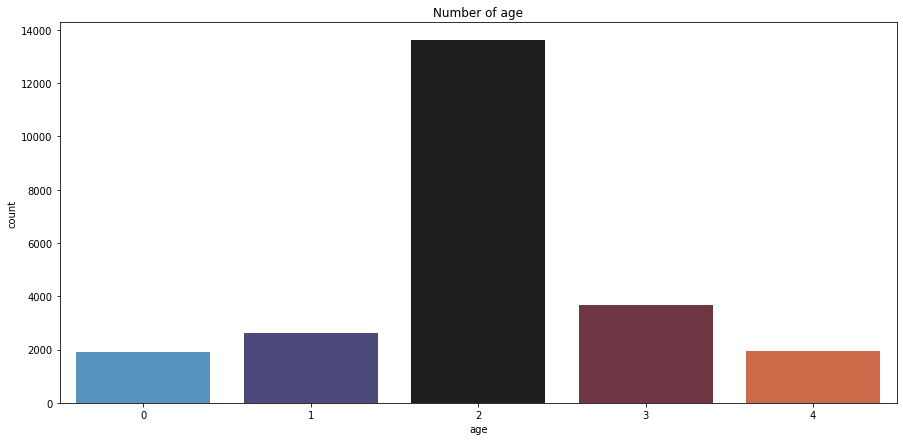

In [77]:
y["age"] = pd.cut(y["age"], bins=[0, 3, 18, 45, 64, 116], labels=["0", "1", "2", "3", "4"])
plt.figure(figsize=(15, 7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

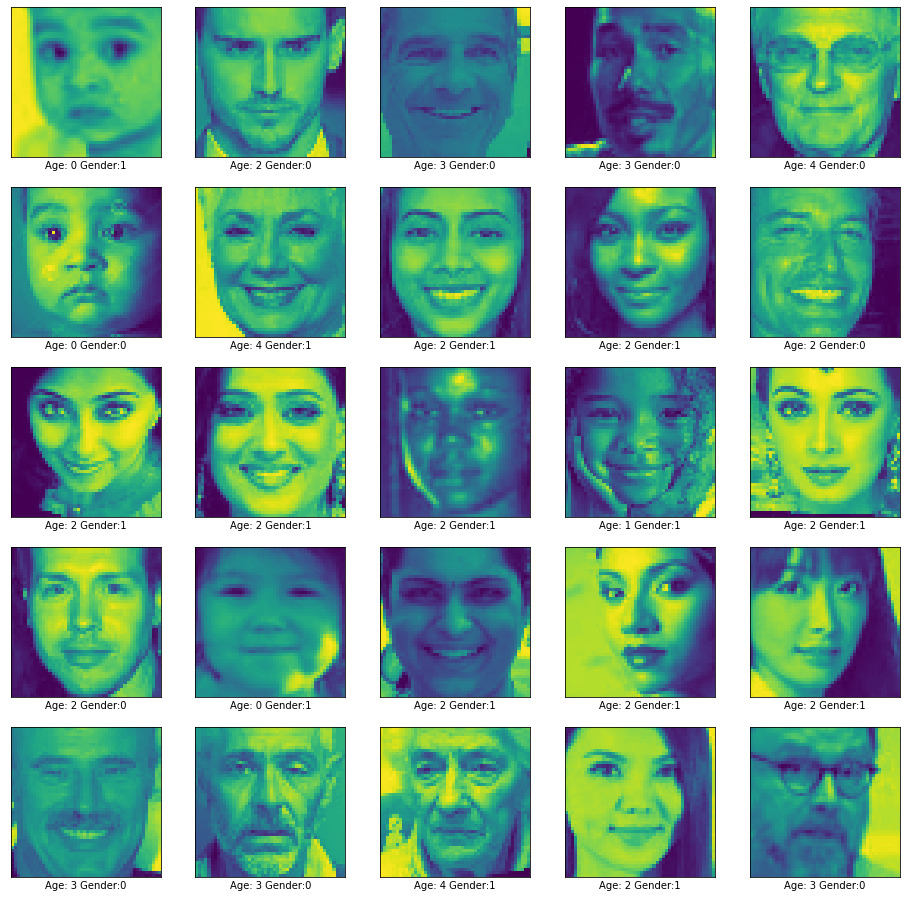

In [78]:
plt.figure(figsize=(16,16))
for i, a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.reshape(-1, 48, 48)[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+" Gender:"+str(y['gender'].iloc[i]))
plt.show()

In [79]:
# Normalization

X = X / 255

In [80]:
X

array([[[[0.50588235],
         [0.50196078],
         [0.50196078],
         ...,
         [0.4627451 ],
         [0.38823529],
         [0.20784314]],

        [[0.50980392],
         [0.50588235],
         [0.50196078],
         ...,
         [0.45882353],
         [0.38431373],
         [0.20392157]],

        [[0.51372549],
         [0.50588235],
         [0.50980392],
         ...,
         [0.44705882],
         [0.38039216],
         [0.19607843]],

        ...,

        [[0.4745098 ],
         [0.54117647],
         [0.57647059],
         ...,
         [0.59215686],
         [0.58823529],
         [0.58039216]],

        [[0.45882353],
         [0.5372549 ],
         [0.57254902],
         ...,
         [0.58431373],
         [0.58039216],
         [0.58039216]],

        [[0.45098039],
         [0.52941176],
         [0.55686275],
         ...,
         [0.57254902],
         [0.57254902],
         [0.57254902]]],


       [[[0.64313725],
         [0.29019608],
         [0.43

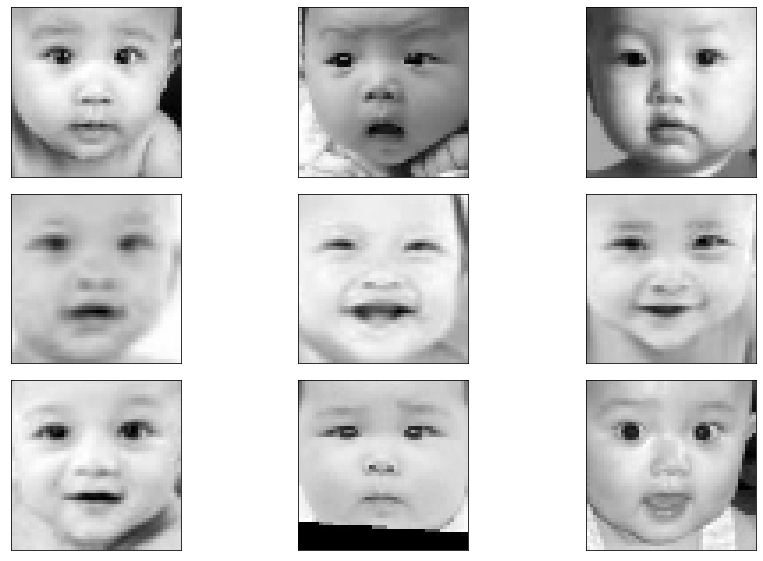

In [81]:
# Plot the images

def plot_images(X):
    fig, axes = plt.subplots(3, 3, figsize = (15, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(48, 48), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# plot first 9 images
plot_images(X[:9])

In [82]:
y_age= np.array(y['age'])
y_gender= np.array(y['gender'])

In [83]:
y_age

array(['0', '0', '0', ..., '4', '4', '4'], dtype=object)

In [84]:
y_gender

array([0, 0, 0, ..., 1, 1, 1])

Train Test Split

train-test split of test size 0.8

In [85]:
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.8, random_state=42)
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.8, random_state=42)

**6. Data Modeling and Evaluation**

In [86]:
input_shape = X.shape[1:]

CallBacks

In [87]:
input_shape

(48, 48, 1)

In [88]:
# Age Detection

# One Hot Encoding the categorical and numerical values
age_matrix = np.array(y['age'])
gender_matrix = np.array(y['gender'])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(y["gender"], num_classes = 2)
print(age, gender)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [89]:
# Train Test Split of One Hot Encoded X and target variable for age detection
X_age_train1, X_age_test1, y_age_train1, y_age_test1 = train_test_split(X, age, test_size=0.3, random_state=42)

In [90]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2,verbose=1, factor=0.5, min_lr = 0.00001)

In [91]:
# Creating sequential model for age

age_model = Sequential()
age_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = "same", input_shape = input_shape))
age_model.add(BatchNormalization())
age_model.add(MaxPool2D((2, 2)))
age_model.add(Dropout(0.2))

age_model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = "same"))
age_model.add(BatchNormalization())
age_model.add(MaxPool2D(pool_size=(2, 2)))
age_model.add(Dropout(0.2))

age_model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = "same"))
age_model.add(BatchNormalization())
age_model.add(Dropout(0.2))
age_model.add(Flatten())

age_model.add(Dense(256, activation = 'relu'))

age_model.add(Dense(5, activation = 'softmax'))

age_model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       2

In [94]:
batch_size = 64
age_history = age_model.fit(X_age_train1, y_age_train1, validation_split = 0.2, epochs = 50, batch_size = batch_size, steps_per_epoch= X_age_train1.shape[0] // batch_size, validation_data = (X_age_test1, y_age_test1), callbacks = [early_stopping, learning_rate_reduction])
age_model.save('/content/drive/MyDrive/Colab Notebooks/age gender detection/age_model.h5')

Epoch 1/50
259/259 [==============================] - 4s 14ms/step - loss: 0.3628 - accuracy: 0.8601 - val_loss: 0.6773 - val_accuracy: 0.7486 - lr: 1.2500e-04
Epoch 2/50
259/259 [==============================] - 3s 14ms/step - loss: 0.3264 - accuracy: 0.8734 - val_loss: 0.5395 - val_accuracy: 0.8003 - lr: 1.2500e-04
Epoch 3/50
259/259 [==============================] - 3s 13ms/step - loss: 0.2943 - accuracy: 0.8876 - val_loss: 0.5696 - val_accuracy: 0.7942 - lr: 1.2500e-04
Epoch 4/50
258/259 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.8976
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
259/259 [==============================] - 4s 14ms/step - loss: 0.2696 - accuracy: 0.8975 - val_loss: 0.5704 - val_accuracy: 0.7965 - lr: 1.2500e-04
Epoch 5/50
259/259 [==============================] - 3s 13ms/step - loss: 0.2383 - accuracy: 0.9103 - val_loss: 0.6094 - val_accuracy: 0.7947 - lr: 6.2500e-05
Epoch 6/50
256/259 [====================

In [95]:
age_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

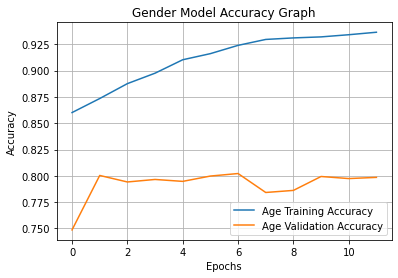

In [96]:
# Plot Gender Accuracy Curves

plt.plot(age_history.history['accuracy'])
plt.plot(age_history.history['val_accuracy'])
plt.title('Gender Model Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Age Training Accuracy', 'Age Validation Accuracy'], loc='lower right')
plt.grid()
plt.show()

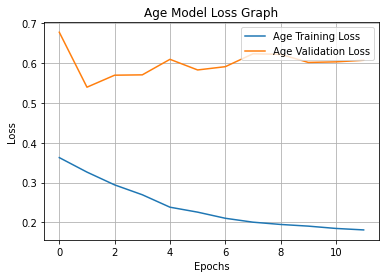

In [97]:
# Plot Age Loss Curves
plt.plot(age_history.history['loss'])
plt.plot(age_history.history['val_loss'])
plt.title('Age Model Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Age Training Loss', 'Age Validation Loss'], loc='upper right')
plt.grid()
plt.show()

In [98]:
age_model_score = age_model.evaluate(X_age_test1, y_age_test1, verbose=1)
print('Accuracy for the age test set: {0}'.format(age_model_score[1]))
print('Loss for the age test set: {0}'.format(age_model_score[0]))

223/223 [==============================] - 1s 4ms/step - loss: 0.5395 - accuracy: 0.8003
Accuracy for the age test set: 0.8003374338150024
Loss for the age test set: 0.5394535660743713


In [ ]:
# age_model_score

In [99]:
print(age_history.history['lr'])

[0.000125, 0.000125, 0.000125, 0.000125, 6.25e-05, 6.25e-05, 3.125e-05, 3.125e-05, 3.125e-05, 1.5625e-05, 1.5625e-05, 1e-05]


In [ ]:
# gender Detecting Model

gender_model = Sequential()
gender_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
gender_model.add(MaxPooling2D((2, 2)))
# MaxPool and MaxPooling Layers are one and the same
gender_model.add(Dropout(0.25))

gender_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))

gender_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Flatten())
gender_model.add(Dropout(0.3))
gender_model.add(Dense(128, activation='relu'))

gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'accuracy'])
gender_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 10, 10, 64)       

In [ ]:
gender_history = gender_model.fit(X_gender_train, y_gender_train, validation_split=0.2, epochs=50, batch_size=64, validation_data=(X_gender_test, y_gender_test,), callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],)
gender_model.save('/content/drive/MyDrive/Colab Notebooks/age gender detection/gender_model.h5')     

Epoch 1/50
297/297 [==============================] - 7s 11ms/step - loss: 0.5170 - mae: 0.3497 - accuracy: 0.7297 - val_loss: 0.3964 - val_mae: 0.2696 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 3s 9ms/step - loss: 0.3690 - mae: 0.2369 - accuracy: 0.8329 - val_loss: 0.3257 - val_mae: 0.2134 - val_accuracy: 0.8543 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 3s 10ms/step - loss: 0.3374 - mae: 0.2141 - accuracy: 0.8475 - val_loss: 0.2924 - val_mae: 0.1930 - val_accuracy: 0.8743 - lr: 0.0010
Epoch 4/50
297/297 [==============================] - 3s 11ms/step - loss: 0.3177 - mae: 0.2006 - accuracy: 0.8563 - val_loss: 0.2792 - val_mae: 0.1853 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 5/50
297/297 [==============================] - 3s 9ms/step - loss: 0.2990 - mae: 0.1882 - accuracy: 0.8653 - val_loss: 0.2665 - val_mae: 0.1643 - val_accuracy: 0.8895 - lr: 0.0010
Epoch 6/50
297/297 [==============================] - 3s 9ms/s

In [ ]:
age_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

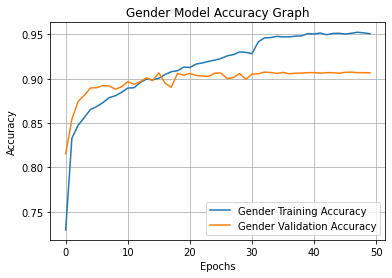

In [ ]:
# Plot Gender Accuracy Curves
plt.plot(gender_history.history['accuracy'])
plt.plot(gender_history.history['val_accuracy'])
plt.title('Gender Model Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Gender Training Accuracy', 'Gender Validation Accuracy'], loc='lower right')
plt.grid()
plt.show()

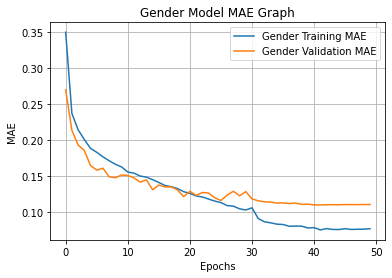

In [ ]:
# Plot Gender MAE Curves
plt.plot(gender_history.history['mae'])
plt.plot(gender_history.history['val_mae'])
plt.title('Gender Model MAE Graph')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['Gender Training MAE', 'Gender Validation MAE'], loc='upper right')
plt.grid()
plt.show()

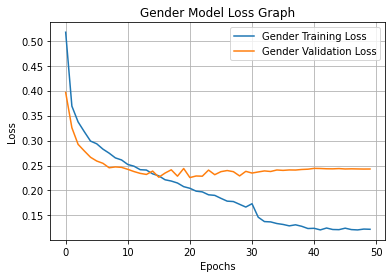

In [ ]:
# Plot Gender Loss Curves
plt.plot(gender_history.history['loss'])
plt.plot(gender_history.history['val_loss'])
plt.title('Gender Model Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Gender Training Loss', 'Gender Validation Loss'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
gender_model_score = gender_model.evaluate(X_gender_test, y_gender_test, verbose=1)
print('Accuracy for the gender test set: {0}'.format(gender_model_score[2]))
print('Loss for gender test set: {0}'.format(gender_model_score[0]))

149/149 [==============================] - 1s 4ms/step - loss: 0.2430 - mae: 0.1102 - accuracy: 0.9066
Accuracy for the gender test set: 0.9065598249435425
Loss for gender test set: 0.24301062524318695


In [ ]:
input_shape

(48, 48, 1)

Create combined CNN model with 'relu' activation and 'adam' optimizer

In [ ]:
# Combined model for age and gender detection

inputs = tf.keras.Input(shape=(48, 48, 1))
x = inputs

x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)

# Age prediction branch
age = tf.keras.layers.Dense(1, name='age')(x)

# Gender prediction branch
gender = tf.keras.layers.Dense(1, activation='sigmoid', name='gender')(x)

model = tf.keras.Model(inputs=inputs, outputs=[age, gender])
model.compile(optimizer='adam', loss=['mse', 'binary_crossentropy'], metrics=['mae', 'accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 48, 48, 16)   160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 24, 24, 16)  0           ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 24, 24, 32)   4640        ['max_pooling2d_2[0][0]']        
                                                                                              

In [ ]:
# Training the model
# X_gender_train canbe used for prediction of gender and age as it has validation split of 0.2
history = model.fit(X_gender_train, [y_age_train, y_gender_train], validation_split=0.2, epochs=50, batch_size=64, validation_data=(X_gender_test, [y_age_test, y_gender_test]), callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

In [ ]:
# Evaluating the model with a batch size of 64
metrics = model.evaluate(X_gender_test, [y_age_test, y_gender_test], batch_size=64)

# Printing the evaluation metrics
print("Loss: ", metrics[0])
print("Age Loss: ", metrics[1])
print("Gender Loss: ", metrics[2])
print("Age MAE: ", metrics[3])
print("Gender Accuracy: ", metrics[6])

In [ ]:
# For 50 epochs
# Evaluating the model
metrics = model.evaluate(X_gender_test, [y_age_test, y_gender_test], batch_size=64)

# Printing the evaluation metrics
print("Loss: ", metrics[0])
print("Age Loss: ", metrics[1])
print("Gender Loss: ", metrics[2])
print("Age MAE: ", metrics[3])
print("Age Accuracy: ", metrics[5])
print("Gender Accuracy: ", metrics[6])

In [ ]:
# Check for overfitting for age

plt.figure()

plt.plot(history.history['age_loss'], 'blue')
plt.plot(history.history['val_age_loss'], 'red')

plt.legend(['Age Training loss', 'Age Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Age Loss Curves')
plt.grid()

**7. Model Testing**

In [ ]:
age_pred = age_model.predict(X_age_test)
gender_pred = gender_model.predict(X_gender_test)

149/149 [==============================] - 0s 2ms/step


In [ ]:
print(age_pred)

[[2.1795493e-02 3.5313872e-01 5.4358375e-01 7.2602198e-02 8.8799270e-03]
 [2.6540627e-05 7.9192696e-03 6.4909774e-01 3.0662647e-01 3.6329977e-02]
 [6.1290096e-03 9.8410946e-01 9.7237425e-03 3.6046396e-05 1.8002498e-06]
 ...
 [6.5370280e-01 3.3825037e-01 8.0036260e-03 4.1371171e-05 1.8633395e-06]
 [2.8856160e-04 8.6627221e-03 1.2081591e-01 3.4698984e-01 5.2324295e-01]
 [4.0204229e-04 5.0904974e-02 8.6091292e-01 7.8948766e-02 8.8313185e-03]]


In [ ]:
print(gender_pred)

[[9.9079353e-01]
 [3.4593786e-06]
 [7.0734978e-02]
 ...
 [8.0876505e-01]
 [7.4620773e-03]
 [1.7527433e-04]]


In [ ]:
y_gender_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_gend = [[i] for i in y_gender_test]

In [ ]:
y_gend[:5]

[[1], [0], [0], [0], [0]]

In [ ]:
gender_pred.round(0).astype(int)

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
pred_rounded = gender_pred.round(0).astype(int)

In [ ]:
(pred_rounded == y_gend).sum()

4298

In [ ]:
print("Accuracy Score(Gender): ",accuracy_score(y_gend, pred_rounded))

Accuracy Score(Gender):  0.9065597975110736


In [ ]:
gender_pred.shape

(4741, 1)

In [ ]:
y_gender_test.shape

(4741,)

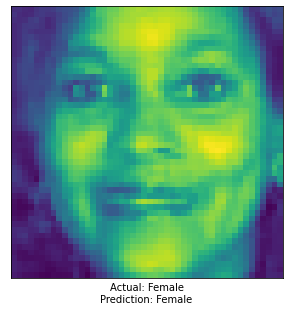

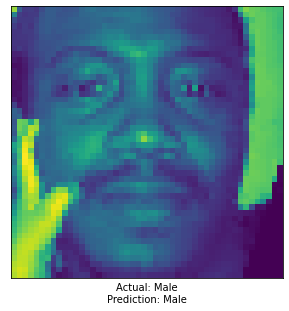

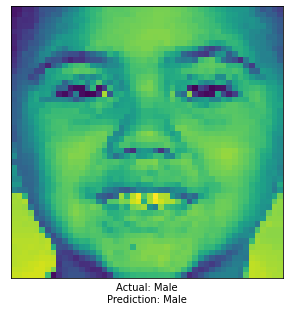

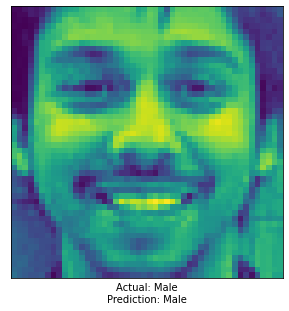

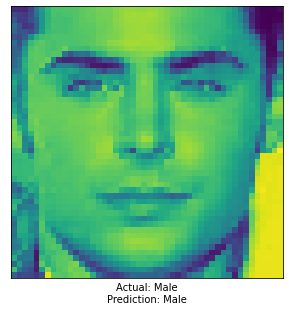

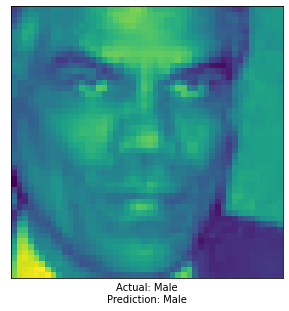

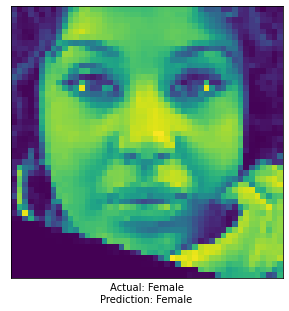

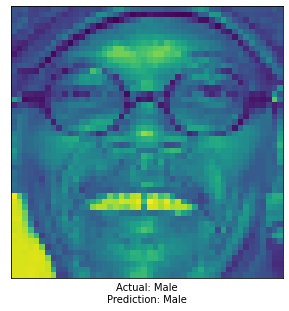

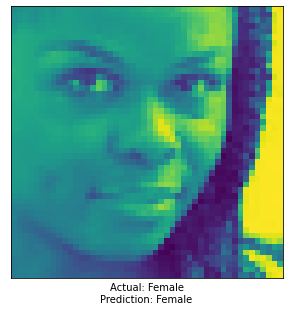

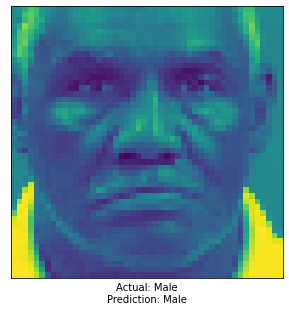

In [ ]:
gen_map={0:'Male',1:'Female'}
for num in range(10):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_gender_test[num].reshape(48,48))
    if gender_pred[num].round(0)==0:
        plt.xlabel("Actual: "+str(gen_map[y_gender_test[num]])+'\n'+"Prediction: Male")
    else:
        plt.xlabel("Actual: "+str(gen_map[y_gender_test[num]])+'\n'+"Prediction: Female")
plt.show()

In [ ]:
pred = [np.round_(p) for p in gender_pred]
print("Accuracy score : ", accuracy_score(pred, y_gender_test))

Accuracy score :  0.9065597975110736


In [ ]:
# We were able to create a individual Sequential CNN for Gender Detection and obtain accuracy of 90.99%

In [ ]:
matrix = tf.math.confusion_matrix(labels=y_gender_test, predictions=pred).numpy()
print("Confusion matrix:\n", matrix)

Confusion matrix:
 [[2227  241]
 [ 202 2071]]


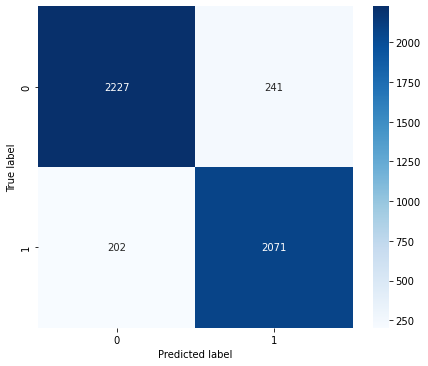

In [ ]:
figure = plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print("Classification report:\n", classification_report(y_gender_test, pred))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2468
           1       0.90      0.91      0.90      2273

    accuracy                           0.91      4741
   macro avg       0.91      0.91      0.91      4741
weighted avg       0.91      0.91      0.91      4741



In [ ]:
# saving model
gender_model.save("/content/drive/MyDrive/Colab Notebooks/age gender detection/gender_model.h5")

Age Validation

In [ ]:
X[10500].shape

(48, 48, 1)

In [ ]:
image_test=X[10500]  
age_predictions = age_model.predict(np.array([image_test]))
gender_predictions = gender_model.predict(np.array([image_test]))
print(age_predictions[0][0])
print(gender_predictions[0][0])

1/1 [==============================] - 0s 73ms/step
2.6729944e-05
0.9965759


In [ ]:
from keras.utils.image_dataset import image_dataset_from_directory
def test_image(ind,X_age_test, y_age_test,age_model):
    plt.imshow(X_age_test[ind].reshape(48,48))
    image_test=X_age_test[ind]  
    age_predictions = age_model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age_p=int(np.round(age_predictions[0][0]))
    age_a=int(np.round(y_age_test[ind]))
    print("Predicted Age: "+ str(age_p))
    print("Actual Age: "+ str(age_a))

In [ ]:
len(X_age_test)

4741

1/1 [==============================] - 0s 22ms/step
Predicted Age: 55
Actual Age: 60


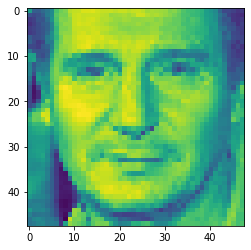

In [ ]:
test_image(2500,X_age_test,y_age_test,age_model)

1/1 [==============================] - 0s 21ms/step
Predicted Age: 14
Actual Age: 1


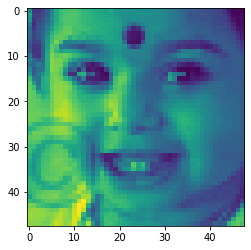

In [ ]:
test_image(3050,X_age_test,y_age_test,age_model)